In [1]:
import keras
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [2]:
import os

In [3]:
pip install opencv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
cats=['with_mask','without_mask']

In [6]:
import cv2

In [7]:
count=0
data=[]
for cat in cats:
    path=os.path.join('data',cat)
    label=cats.index(cat)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        data.append([img,label])
        
        
        

In [8]:
len(data)

7553

In [9]:
import random 

In [10]:
random.shuffle(data)

In [11]:
import matplotlib.pyplot as plt

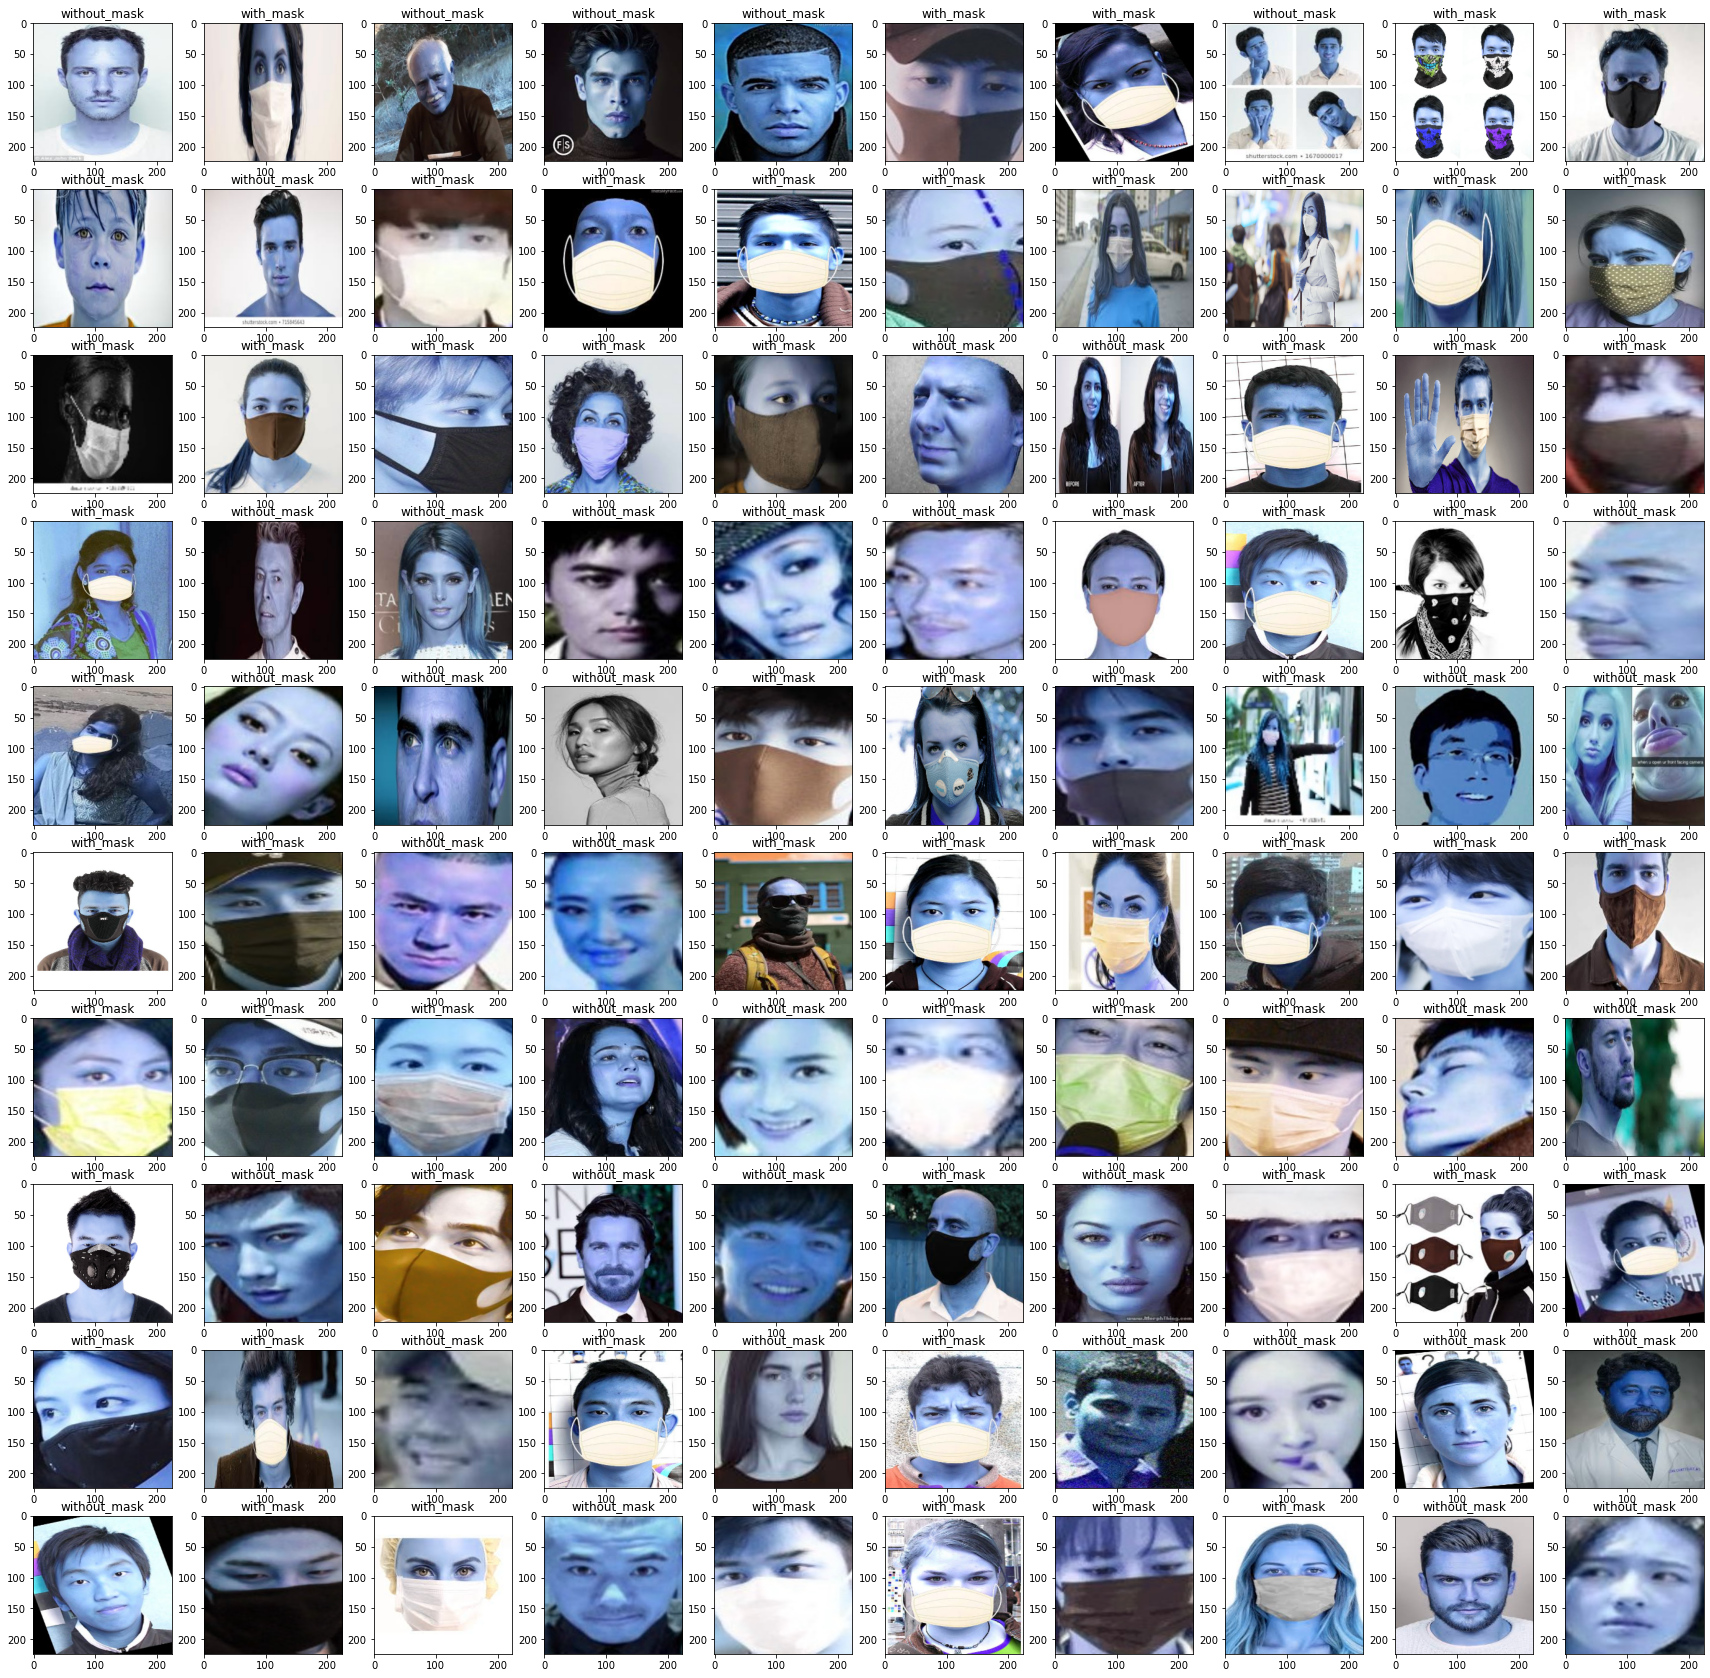

In [12]:
plt.figure(figsize=(30,30))
row=10
col=10
for i in range(row*col):
    plt.subplot(col,row,i+1)
    plt.imshow(data[i][0])
    plt.title(cats[data[i][1]])
plt.show()

In [13]:
x=[]
y=[]
for ft,label in data[:2000]:
    x.append(ft)
    y.append(label)

In [14]:
len(x)

2000

In [15]:
len(y)

2000

In [16]:
len(x[0])

224

In [17]:
len(x[0][0])

224

In [18]:
len(x[0][0][0])

3

In [19]:
import numpy as np
x=np.array(x)

In [20]:
y=np.array(y)

In [21]:
x.shape

(2000, 224, 224, 3)

In [22]:
x=x/255

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
print((x_train.shape),"---shape of xtrain")

(1600, 224, 224, 3) ---shape of xtrain


In [25]:
type(x_train[0])

numpy.ndarray

In [26]:
x_train.shape

(1600, 224, 224, 3)

In [27]:
from keras.applications.vgg19 import VGG19

In [28]:
vgg19=VGG19()

In [29]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [30]:
from keras import Sequential

In [31]:
model=Sequential()

In [32]:
n=len(vgg19.layers)
print(n)

26


In [33]:
for layer in vgg19.layers[:-2]:
    model.add(layer)

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [35]:
for layer in model.layers:
    layer.trainable=False

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [37]:
from keras.layers import Dense

In [38]:
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [40]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
from tensorflow.keras import datasets,layers,models

In [42]:
cnn=models.Sequential([
    ##cnn
    layers.Conv2D(filters=100,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=80,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense layrers
    
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(40,activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [43]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 60)        43260     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 60)      

In [44]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
history=cnn.fit(x_train,y_train,epochs=2)

Epoch 1/2
50/50 [==============================] - 86s 2s/step - loss: 0.6531 - accuracy: 0.5856
Epoch 2/2
50/50 [==============================] - 86s 2s/step - loss: 0.3263 - accuracy: 0.8594


In [46]:
cnn.evaluate(x_test,y_test)

13/13 [==============================] - 5s 374ms/step - loss: 0.2301 - accuracy: 0.9100


[0.23008307814598083, 0.9100000262260437]

In [47]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 194s 4s/step - loss: 0.6388 - accuracy: 0.6600
Epoch 2/5
50/50 [==============================] - 198s 4s/step - loss: 0.4199 - accuracy: 0.8119
Epoch 3/5
50/50 [==============================] - 200s 4s/step - loss: 0.3560 - accuracy: 0.8481
Epoch 4/5
50/50 [==============================] - 207s 4s/step - loss: 0.2771 - accuracy: 0.9050
Epoch 5/5
50/50 [==============================] - 209s 4s/step - loss: 0.2546 - accuracy: 0.9212


In [49]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 51s 4s/step - loss: 0.2257 - accuracy: 0.9375


[0.2256907969713211, 0.9375]